In [42]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/data.csv')

In [5]:
print(df)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [8]:
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [9]:
print(df.tail())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_wor

In [10]:
print(df.shape)

(569, 33)


In [11]:
print(df.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [22]:
data = df.dropna(axis=1, how='all')
labels = data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
features = data.drop(columns=['diagnosis'])

In [23]:
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

In [24]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)

In [29]:
model = LogisticRegression(max_iter=10000)
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning)
    model.fit(X_train, y_train)

In [31]:
y_pred = model.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Model Accuracy: 0.97
[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [39]:
def visualize_data(data, index, labels, predictions):
    row_data = data[index]
    label = labels.iloc[index]
    predicted_label = predictions[index]
    print(f'Features: {row_data}')
    print(f'True Label: {label}, Predicted Label: {predicted_label}')
    print('---')
for i in range(5):
    visualize_data(X_test, i, y_test.reset_index(drop=True), y_pred)

Features: [-0.24244446 -0.47069438 -0.16048584 -0.44810956 -0.49199876  0.23411429
  0.02765051 -0.10984741 -0.27623152  0.41394897  0.13217601 -0.03274296
 -0.31361556 -0.18269561 -0.22105292 -0.02932749 -0.35591235 -0.16192949
 -0.23133322 -0.32961186 -0.07901817 -0.26903951 -0.16890536 -0.33393537
 -0.35629925  0.4485028  -0.10474068 -0.02441212 -0.19956318  0.18320441
  0.19695794]
True Label: 0, Predicted Label: 0
---
Features: [-0.23626688  1.36687747  0.47014935  1.30288585  1.35126414 -0.44622733
 -0.02730878  0.24106404  0.78905995 -0.83832462 -1.16067889  1.38459382
 -0.76085133  1.29695088  1.22577951 -0.86569474 -0.50066625 -0.30516783
  0.30882497 -0.80908274 -0.7931567   1.77900671  0.1470116   1.74660545
  1.73227684 -0.57287347 -0.13145855 -0.01673608  0.97897545 -0.56582801
 -1.00057787]
True Label: 1, Predicted Label: 1
---
Features: [-0.24307899  0.37850807  0.04429607  0.40082046  0.26737664  0.91374426
  0.34034992  0.72568592  0.82413977  0.43585463 -0.68578153  0

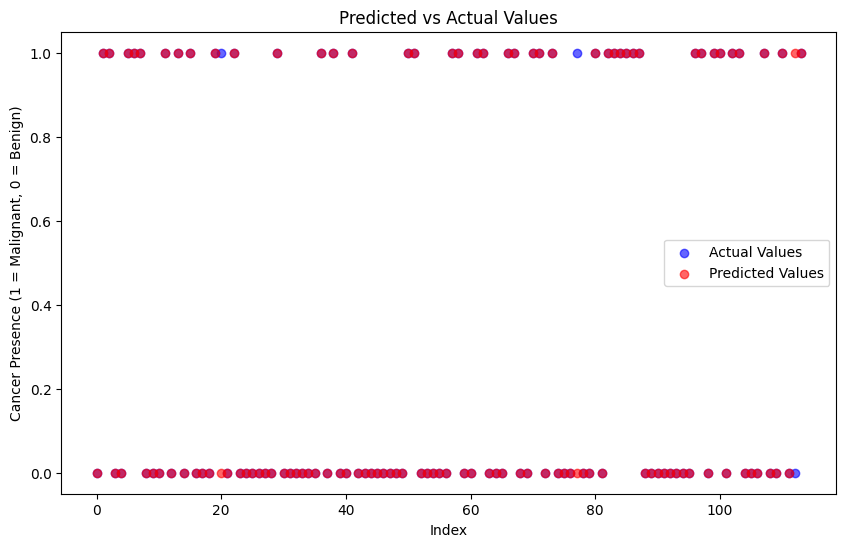

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', alpha=0.6, label='Actual Values')
plt.scatter(range(len(y_pred)), y_pred, color='red', alpha=0.6, label='Predicted Values')
plt.xlabel('Index')
plt.ylabel('Cancer Presence (1 = Malignant, 0 = Benign)')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()